# Brincadeirinha

In [2]:
import pickle
import datetime

import numpy as np
import pandas as pd


from matplotlib import pyplot as plt
from prophet    import Prophet

from IPython.display        import Image
from IPython.core.display   import HTML

In [70]:
with open('../data/interim/3_0_feature_engineering.pkl', 'rb') as arquivo:
    df = pickle.load(arquivo)
df.sample()

,subscription_name,subscription_guid,date,resource_guid,service_name,service_type,service_region,service_resource,quantity,cost,maquina,year,month,day,week_of_year,year_week,year_month,dia_da_semana,fim_de_semana,custo_diario
11673,Microsoft Azure Sponsorship,0b1856f5-ffb1-4fb2-9b31-ebc3ddeacf68,2022-12-30,f114cb19-ea64-40b5-bcd7-aee474b62853,Virtual Network,IP Addresses,All,Basic IPv4 Dynamic Public IP,24.0,0.096,ceaec,2022,12,30,52,2022-52,2022-12,4,0,9.091473


CEAEC - 07 Jan 2025 - Mais ou menos - Aqui.

Editares - 08 Sep 2025 - Mais variado, talvez tenha que aumentar disco - Depois.

UNICIN - 12 Mar 2025 - Menos mexido - Aqui.

Normalmente, os créditos são disponibilizados 30 dias antes.

In [71]:
df['service_name'].unique()

array(['Storage', 'Azure DNS', 'Bandwidth', 'Virtual Network',
       'Log Analytics', 'Virtual Machines', 'Virtual Machines Licenses',
       'Automation', 'Azure Monitor', 'Network Watcher', 'Backup',
       'Key Vault', 'Functions', 'Azure App Service', 'Logic Apps'],
      dtype=object)

In [72]:
df = df[
    (df['service_name'] != 'Functions') &
    (df['maquina'] == 'unicin') 
    ]

In [73]:
df['date'].max()

Timestamp('2024-10-31 00:00:00')

In [74]:
#filtro_data = (df["Date"])
#filtro_service_name = df['ServiceName'] == "Functions"
#filtro_service_resource = df['ServiceResource'] == "Premium vCPU Duration"

df_aux = df.loc[:, ["date", "cost"]].groupby("date").sum().reset_index()

In [75]:
df_aux.rename(columns = {"date":"ds", "cost":"y"}, inplace = True)

In [76]:
df_aux = df_aux.loc[df_aux['ds'] >= '2023-09-30',:]

In [77]:
df_train = df_aux.loc[df_aux['ds'] <= '2024-09-30',:]
df_test = df_aux.loc[df_aux['ds'] > '2024-09-30',:]

In [78]:
df_train.tail(5)

,ds,y
987,2024-09-26,5.346150
988,2024-09-27,5.376951
989,2024-09-28,5.427124
990,2024-09-29,5.357359
991,2024-09-30,5.359446


In [79]:
m = Prophet()
m.fit(df_train)
future = m.make_future_dataframe(periods=365)
future.info()

15:43:36 - cmdstanpy - INFO - Chain [1] start processing
15:43:36 - cmdstanpy - INFO - Chain [1] done processing


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      732 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 5.8 KB


In [80]:
forecast = m.predict(future)
#forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

In [81]:
ds_future = forecast

In [82]:
futuro = ds_future.loc[ds_future["ds"] > "2024-09-30", [
                                                        'ds',
                                                        'yhat',
                                                        'yhat_lower',
                                                        'yhat_upper'
                                                        ]
                        ].groupby("ds").sum().reset_index()

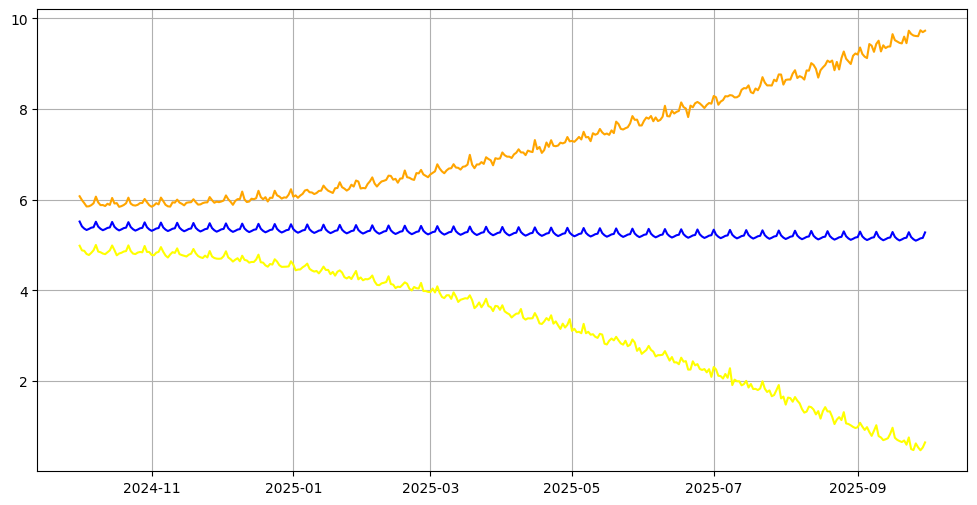

In [83]:
plt.figure(figsize=(12, 6))

plt.plot(futuro['ds'], futuro['yhat'], label='yhat', color='blue')
plt.plot(futuro['ds'], futuro['yhat_lower'], label='yhat_lower', color='yellow')
plt.plot(futuro['ds'], futuro['yhat_upper'], label='yhat_upper', color='orange')

plt.grid(True)
plt.show()

In [84]:
valor_futuro = futuro.loc[futuro['ds'] < '2024-09-30',['yhat']].sum()
#valor_futuro

In [85]:
valor_teste = df_test['y'].sum()
valor_teste

170.83183400000001

In [86]:
((valor_futuro / valor_teste)-1)*100

yhat   -100.0
dtype: float64

In [87]:
#fig2 = m.plot_components(forecast)

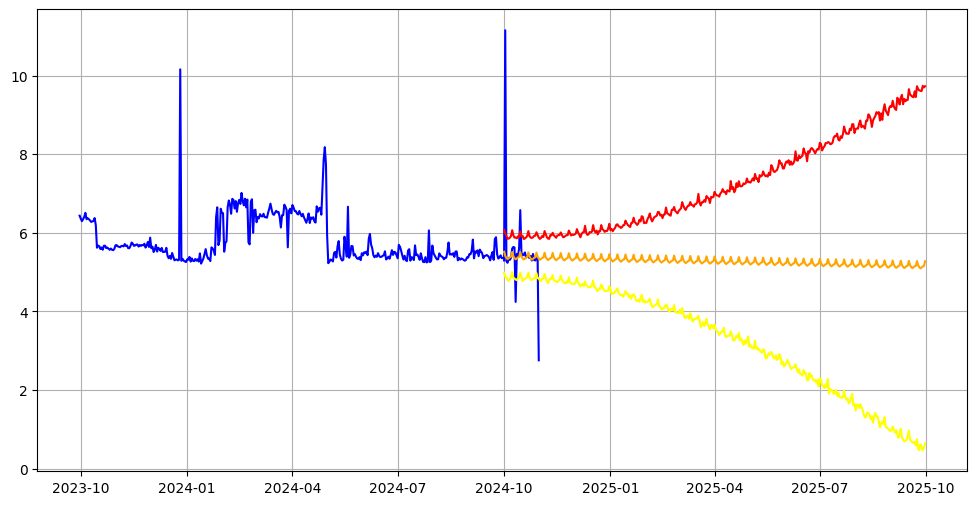

In [88]:
plt.figure(figsize=(12, 6))

plt.plot(df_test['ds'], df_test['y'], label='Dataset 1', color='blue')
plt.plot(df_train['ds'], df_train['y'], label='Dataset 1', color='blue')

plt.plot(futuro['ds'], futuro['yhat'], label='yhat', color='orange')
plt.plot(futuro['ds'], futuro['yhat_lower'], label='yhat_lower', color='yellow')
plt.plot(futuro['ds'], futuro['yhat_upper'], label='yhat_upper', color='red')

plt.grid(True)
plt.show()

In [89]:
futuro[['yhat_upper','yhat','yhat_lower']].sum()

yhat_upper    2638.428632
yhat          1925.509629
yhat_lower    1196.730604
dtype: float64

In [90]:
print(df_test['ds'].min())
print(df_test['ds'].max())

2024-10-01 00:00:00
2024-10-31 00:00:00


In [94]:
futuro.loc[futuro['ds']<='2024-12-31',['yhat_upper','yhat','yhat_lower']].sum()

yhat_upper    548.823595
yhat          493.712876
yhat_lower    438.344414
dtype: float64

In [92]:
valor_teste

170.83183400000001

In [93]:
futuro.loc[futuro['ds']<'2025-06-01',['yhat_upper','yhat','yhat_lower']].sum()

yhat_upper    1578.529591
yhat          1291.622601
yhat_lower    1000.320364
dtype: float64